Multiple linear regression is a widely used method for predicting continuous target variables. It assumes that the relationship between the target variable and the independent variables is linear, meaning that a change in the value of one independent variable is associated with a constant change in the value of the target variable. Multiple linear regression models are relatively easy to interpret and can provide insights into the specific relationships between the independent variables and the target variable.

To use multiple linear regression for real estate price prediction, you would first need to gather a dataset that includes information on the various factors that influence real estate prices, such as location, size, number of rooms, age of the property, and so on. Once you have collected this data, you would split it into a training set and a test set. You would then use the training set to build a multiple linear regression model that predicts the price of a property based on its various features. Once the model is built, you would evaluate its performance using the test set, which would give you an idea of how well the model generalizes to new data.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
df = pd.read_csv('data.csv')

In [91]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [92]:
# Add a new column 'PRICE' to the DataFrame using the 'TARGET' variable values
df['target'] = df['MEDV']

# Drop the 'TARGET' column
df.drop(columns=['MEDV'], inplace=True)

In [93]:
# check for missing values
print(df.isnull().sum())

# drop rows with missing values
df.dropna(inplace=True)

# fill missing values with mean
df.fillna(df.mean(), inplace=True)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


In [94]:
# check for duplicates
print(df.duplicated().sum())

# drop duplicates
df.drop_duplicates(inplace=True)

0


The stats module contains a variety of statistical functions and probability distributions. It provides functions for statistical hypothesis testing, such as t-tests, ANOVA, and chi-square tests, as well as functions for probability distributions, such as normal, uniform, and binomial distributions.

By importing this module using the from keyword, you can directly access the functions and distributions in the stats module without having to specify the module name each time.

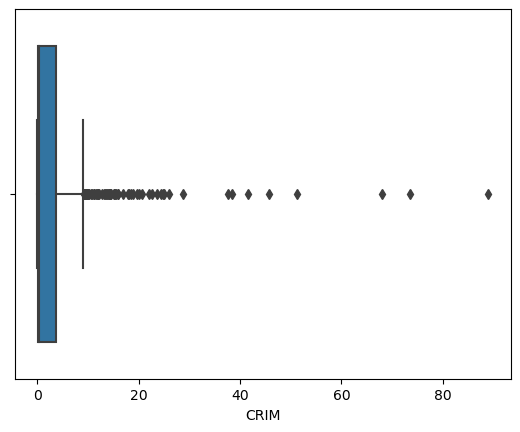

In [95]:
# identify outliers using boxplot
sns.boxplot(x=df['CRIM'])

# remove outliers using z-score
from scipy import stats
z_scores = stats.zscore(df['CRIM'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

In [96]:
# # drop irrelevant features
# df = df.drop(['feature1', 'feature2', 'feature3'], axis=1)


In [97]:
# # add a categorical feature as an example
# df['CHAS'] = pd.Categorical.from_codes(df['CHAS'], ['no', 'yes'])

# # use one-hot encoding to convert the categorical feature to numerical
# df = pd.get_dummies(df, columns=['CHAS'])

A new categorical feature named "CHAS" is added to the dataframe df by converting the existing numerical codes into their corresponding categories ('no' and 'yes') using the pd.Categorical.from_codes() method.

However, most machine learning models cannot work directly with categorical features as they expect numerical values as input. Therefore, the categorical feature 'CHAS' is converted into a numerical feature using one-hot encoding with the pd.get_dummies() function.

One-hot encoding converts each unique value of a categorical feature into a new binary feature column, where a value of 1 indicates the presence of that category and 0 indicates its absence. This makes the feature easier for machine learning models to work with and helps prevent bias due to the inherent ordering or magnitude of the categorical values.

In [98]:
from sklearn.preprocessing import StandardScaler
X = df.drop('target', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     498 non-null    float64
 1   ZN       498 non-null    float64
 2   INDUS    498 non-null    float64
 3   CHAS     498 non-null    int64  
 4   NOX      498 non-null    float64
 5   RM       498 non-null    float64
 6   AGE      498 non-null    float64
 7   DIS      498 non-null    float64
 8   RAD      498 non-null    int64  
 9   TAX      498 non-null    int64  
 10  PTRATIO  498 non-null    float64
 11  B        498 non-null    float64
 12  LSTAT    498 non-null    float64
 13  target   498 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 58.4 KB


In [100]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,498.000000,498.000000,498.00000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,2.778287,11.546185,11.02492,0.070281,0.552766,6.293082,68.158434,3.830554,9.317269,404.096386,18.427510,359.121867,12.494096,22.753012
std,5.088265,23.464449,6.85777,0.255877,0.115729,0.700201,28.162623,2.103572,8.580296,166.659277,2.170867,87.140830,7.007974,9.094994
min,0.006320,0.000000,0.46000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.600000
25%,0.080573,0.000000,5.13000,0.000000,0.448250,5.888250,43.875000,2.113700,4.000000,279.000000,17.075000,376.057500,6.905000,17.225000
50%,0.247510,0.000000,8.56000,0.000000,0.535000,6.211000,76.700000,3.272100,5.000000,330.000000,18.950000,391.600000,11.265000,21.400000
75%,3.103700,12.500000,18.10000,0.000000,0.624000,6.628000,93.875000,5.214600,8.000000,666.000000,20.200000,396.225000,16.635000,25.000000
max,28.655800,100.000000,27.74000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [101]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

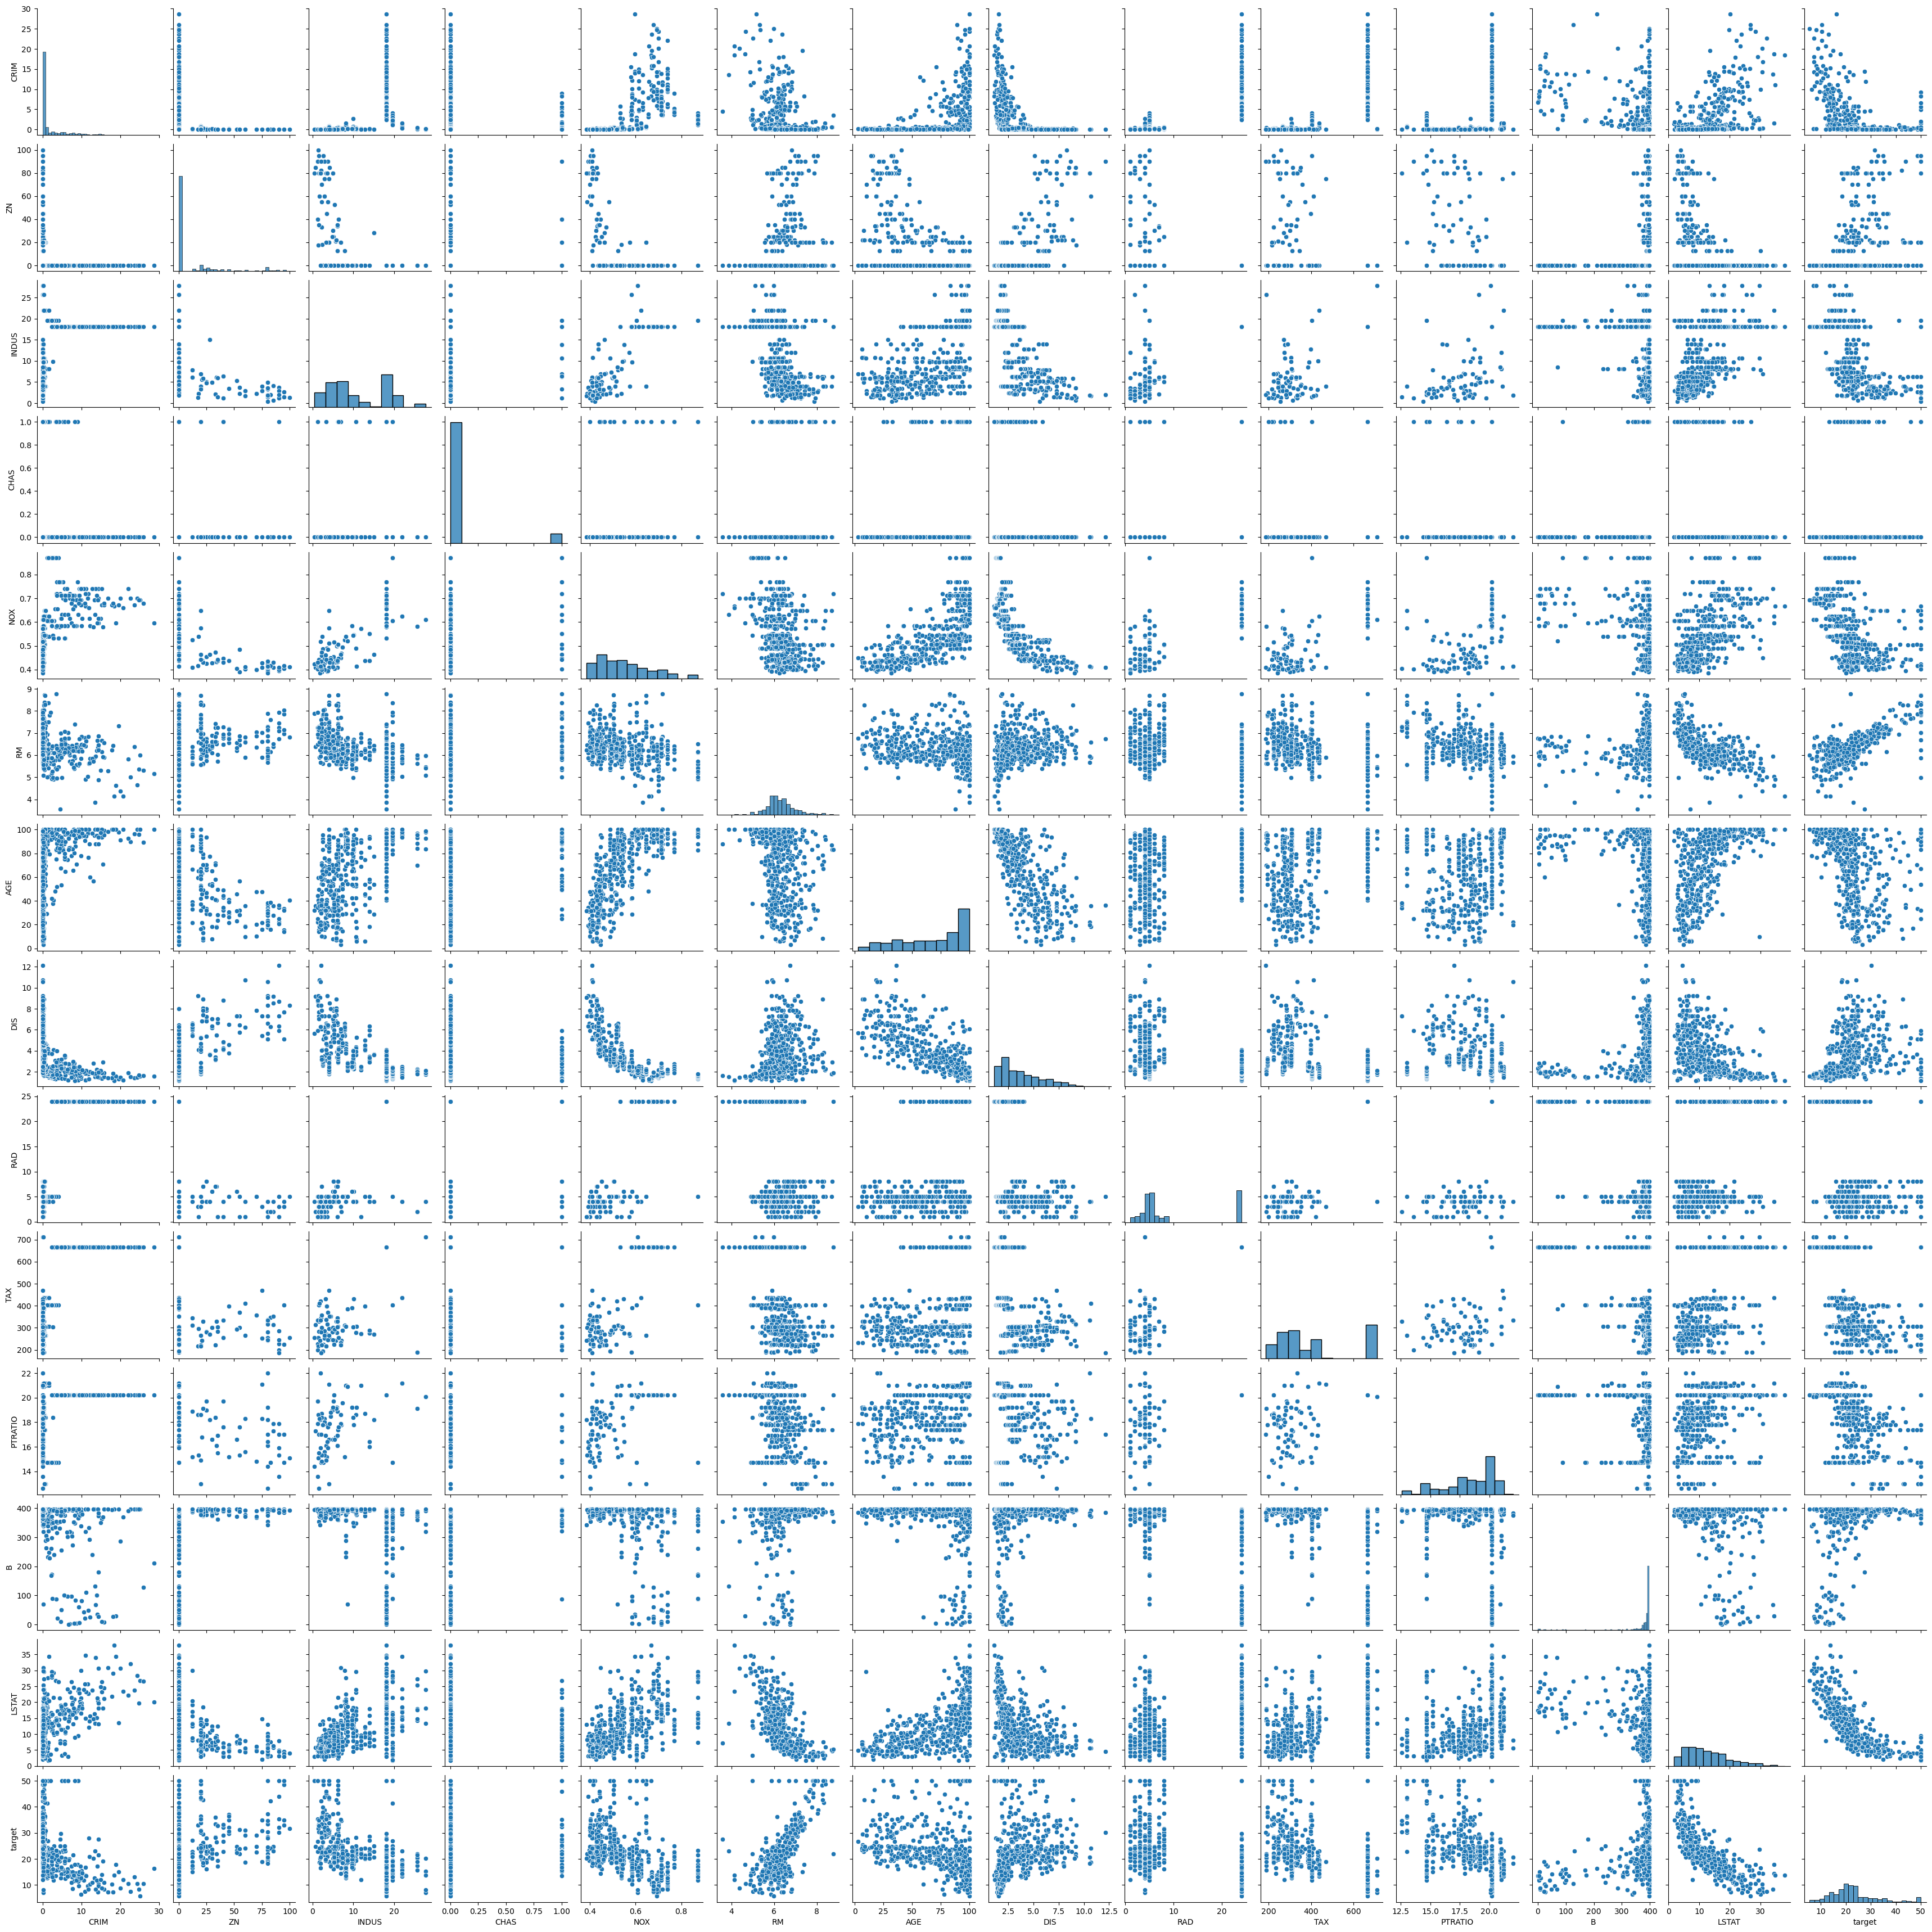

In [102]:
sns.pairplot(df)

In [103]:
# # # Load the data from the 'data.csv' file into a pandas DataFrame object
# df = pd.read_csv('data.csv')

# # # Add a new column 'PRICE' to the DataFrame using the 'TARGET' variable values
# df['target'] = df['MEDV']

# # # Drop the 'TARGET' column
# df.drop(columns=['MEDV'], inplace=True)

<AxesSubplot:>

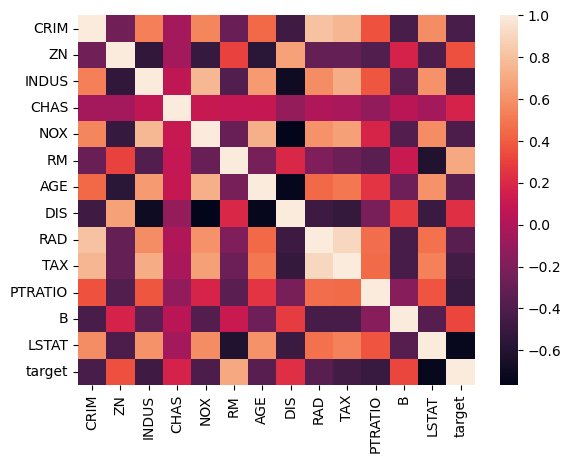

In [104]:
sns.heatmap(df.corr())

Next, we'll use the model to make predictions on the testing set:

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X = df.drop('target', axis=1)
y = df['target']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then, we'll train the multiple linear regression model:

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Next, we'll use the model to make predictions on the testing set:

In [110]:
y_pred = model.predict(X_test)

Finally, we'll evaluate the performance of the model:

In [111]:
from sklearn.metrics import mean_squared_error, r2_score

In [112]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [113]:
print("Mean squared error: {:.2f}".format(mse))
print("Root mean squared error: {:.2f}".format(rmse))
print("R^2 score: {:.2f}".format(r2))

Mean squared error: 17.19
Root mean squared error: 4.15
R^2 score: 0.76


 The output will give us the mean squared error, root mean squared error, and R^2 score for the model's performance on the testing set. We can also examine the coefficients and intercept of the model:

In [114]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

    Feature  Coefficient
0      CRIM    -0.136138
1        ZN     0.030043
2     INDUS     0.026875
3      CHAS     2.118980
4       NOX   -16.774256
5        RM     3.821473
6       AGE    -0.005849
7       DIS    -1.460729
8       RAD     0.264838
9       TAX    -0.009716
10  PTRATIO    -1.007075
11        B     0.011666
12    LSTAT    -0.553702


DataFrame named coefficients that contains the feature names and their corresponding coefficients from a linear regression model.

'Feature': This column contains the names of the features used in the linear regression model. The X.columns attribute returns the names of the columns in the DataFrame X, which presumably contains the feature data used to train the model.
'Coefficient': This column contains the coefficients corresponding to each feature. The model.coef_ attribute returns the coefficients learned by the linear regression model.
The pd.DataFrame() function is used to create the DataFrame, and the {'Feature': X.columns, 'Coefficient': model.coef_} argument specifies the data to be included in the DataFrame. The keys in the dictionary ('Feature' and 'Coefficient') become the column names in the DataFrame, and the values associated with those keys (X.columns and model.coef_) become the data in the respective columns.

In [115]:
print("Intercept: {:.2f}".format(model.intercept_))

Intercept: 36.27


This will show us the coefficients for each feature in the dataset, as well as the intercept of the model. We can use these coefficients to interpret the importance of each feature in predicting the price of a house.


High intercept value does not necessarily mean that the model is the best fit to the data. A high intercept value indicates that the predicted response value is high when all predictor variables are zero. However, the interpretation of the intercept depends on the context of the problem and the scale of the predictor variables.

In multiple regression, it is important to assess the overall performance of the model using metrics such as R-squared, adjusted R-squared, and Root Mean Squared Error (RMSE). These metrics provide a measure of how well the model fits the data and can help in determining the appropriateness of the model for the given problem. Additionally, it is important to evaluate the significance of individual predictor variables using p-values and confidence intervals.

##### Statistical Significance of the Coefficients
We can analyze the statistical significance of the coefficients by examining their p-values. A p-value less than 0.05 indicates that the coefficient is statistically significant. 

In statistical hypothesis testing, a p-value is the probability of obtaining a test statistic at least as extreme as the one that was actually observed, assuming that the null hypothesis is true.

In other words, the p-value is a measure of the strength of evidence against the null hypothesis. A small p-value (typically less than 0.05) indicates strong evidence against the null hypothesis, while a large p-value (greater than 0.05) indicates weak evidence against the null hypothesis.

In general, if the p-value is less than the predetermined significance level (e.g., 0.05), we reject the null hypothesis and conclude that the alternative hypothesis is true.

The first line of code imports the statsmodels.api module and aliases it as sm.

The second line of code adds a constant term to the feature matrix X using the sm.add_constant() function from statsmodels. This is necessary for the linear regression model to include an intercept term.

The third line of code creates a new linear regression model object named model_sm using the sm.OLS() function. This function takes two arguments:

y: The dependent variable data as a pandas Series or numpy array
X_with_intercept: The independent variable data (including the constant term) as a pandas DataFrame or numpy array
The fourth line of code fits the model_sm linear regression model to the data using the .fit() method. This returns a results object, which contains various statistics and information about the fitted model.

The fifth line of code prints a summary of the results using the .summary() method on the results object. This generates a detailed report of the regression results, including the coefficients and standard errors for each feature, as well as various goodness-of-fit statistics and tests of statistical significance.

In [28]:
import statsmodels.api as sm

X_with_intercept = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_intercept)
results = model_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     103.2
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          2.49e-130
Time:                        01:04:37   Log-Likelihood:                -1474.9
No. Observations:                 498   AIC:                             2978.
Df Residuals:                     484   BIC:                             3037.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.2182      5.191      6.785      0.0

##### Multicollinearity
Multicollinearity occurs when two or more attributes in the model are highly correlated with each other. This can lead to unstable and unreliable coefficient estimates. We can use the Variance Inflation Factor (VIF) to measure the degree of multicollinearity between the attributes. A VIF greater than 5 is often considered an indicator of high multicollinearity.

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif)

[4.6371698619017545, 2.883455561431348, 14.105760848042, 1.1569810769810218, 72.46032127980618, 77.1066689537081, 21.037036166863572, 14.929921809536188, 17.267398882448205, 59.041475342832015, 84.66286028861762, 21.65161076644699, 11.940195712891859]


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

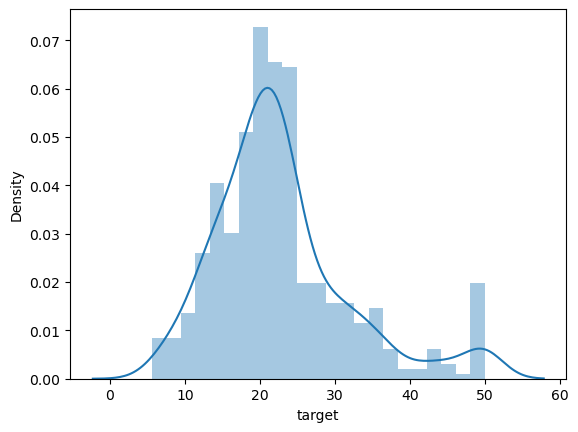

In [30]:
sns.distplot(df['target'])

 The graphs that can be plotted to analyze the performance of the multiple linear regression model on the Boston Housing Dataset:

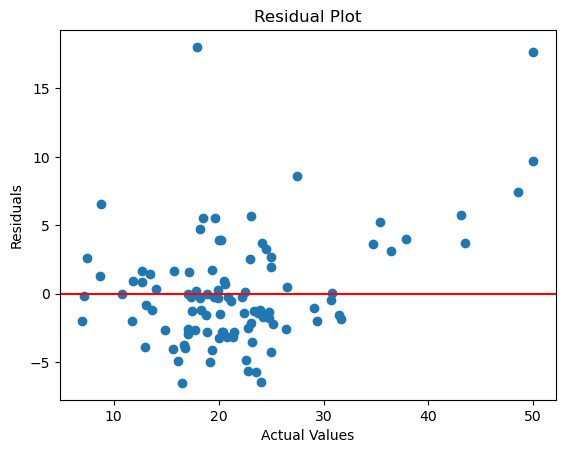

In [31]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

This will create a scatter plot of the residuals (the difference between the predicted values and the actual values) against the true values. The red line represents the mean of the residuals, which should be close to 0 if the model is performing well.

A residuals plot can be used to identify patterns in the residuals that may indicate problems with the model, such as nonlinearity, heteroscedasticity (unequal variance), or outliers. 

A residuals plot can also be used to detect outliers, which are observations that have large residuals relative to the other observations. Outliers may be due to data entry errors, measurement error, or unusual circumstances that are not representative of the typical behavior of the system being studied.

##### Scatter plot of residuals vs predicted values for multiple linear regression:


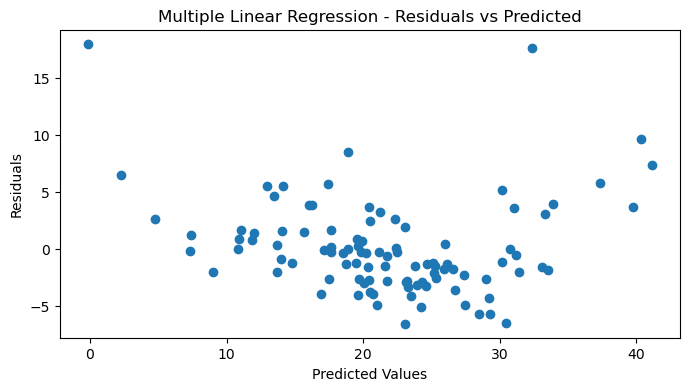

In [32]:
plt.figure(figsize=(8,4))
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Multiple Linear Regression - Residuals vs Predicted')
plt.show()

##### Actual vs. Predicted Values:

This will create a scatter plot of the actual values against the predicted values. The black dashed line represents a perfect prediction (where the predicted value equals the actual value).

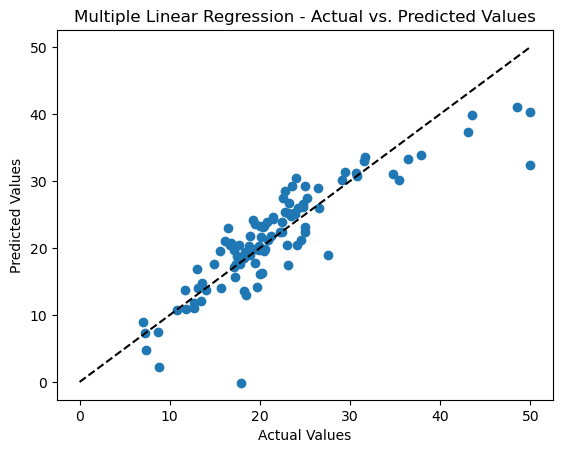

In [116]:
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.title('Multiple Linear Regression - Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

##### Coefficient Plot:

This will create a horizontal bar chart of the coefficients for each feature in the dataset. The features are listed on the y-axis and the coefficients are represented by the length of the bars on the x-axis.

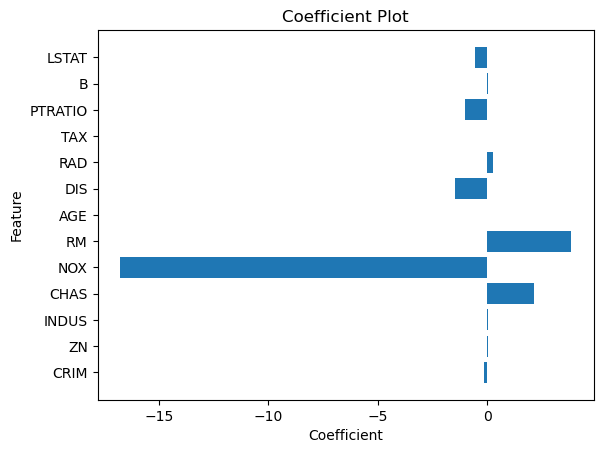

In [34]:
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.title('Coefficient Plot')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

##### Distribution Plot:

This will create a histogram of the true values and predicted values for the house prices. The true values are represented by one color and the predicted values are represented by another color. This graph can be used to compare the distribution of the true values and predicted values, and to identify any biases in the model's predictions.

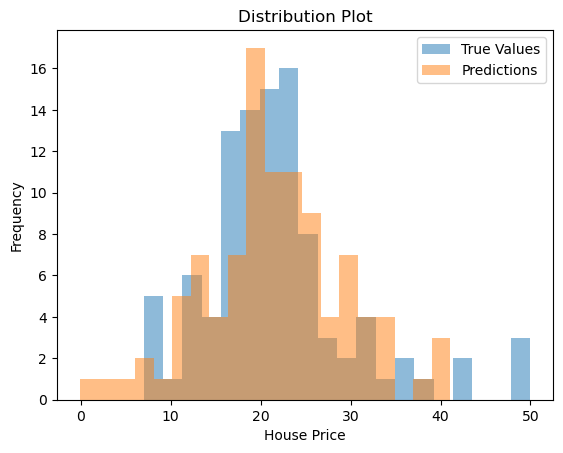

In [35]:
plt.hist(y_test, bins=20, alpha=0.5, label='True Values')
plt.hist(y_pred, bins=20, alpha=0.5, label='Predictions')
plt.title('Distribution Plot')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

##### Scatter plot chart:

This will create a scatter plot of the average number of rooms per dwelling (RM) against the price of the houses (in $1000s). The size of the markers is set to 10 and the figure size is set to 10x6. You can modify the code to plot other features against the price of the houses as well.

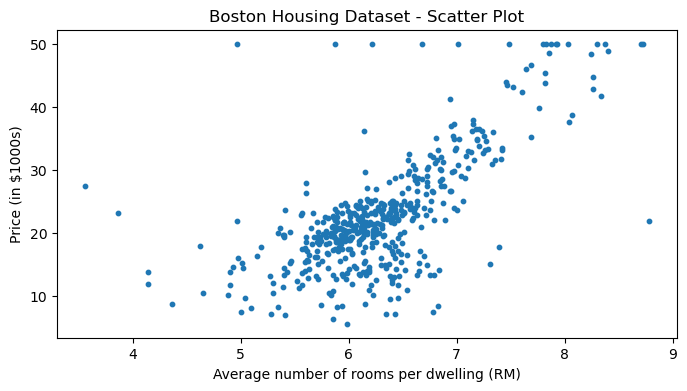

In [36]:
plt.figure(figsize=(8,4))
plt.scatter(df['RM'], df['target'], s=10)
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Price (in $1000s)')
plt.title('Boston Housing Dataset - Scatter Plot')
plt.show()

This figure, create a scatter plot of the average number of rooms per dwelling (RM) against the % lower status of the population (LSTAT), with the color of each point representing the price of the house. The cmap parameter is used to specify a colormap for the colors, and the colorbar 

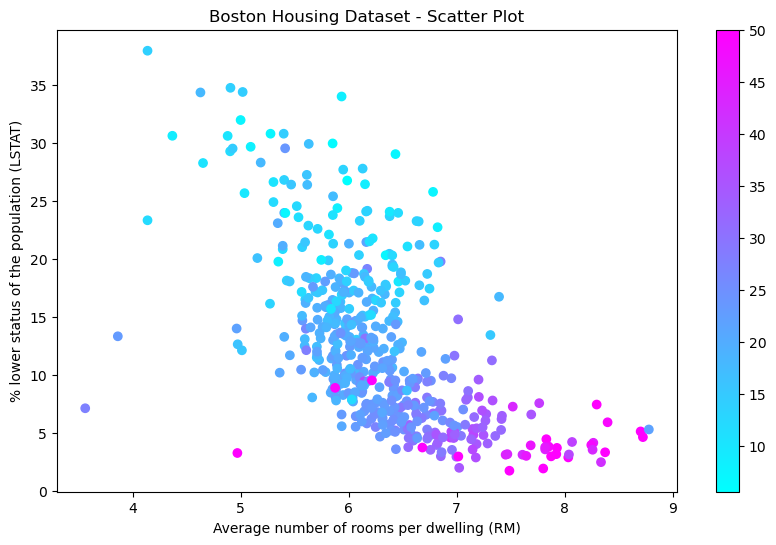

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(df['RM'], df['LSTAT'], c=df['target'], cmap='cool')
plt.colorbar()
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('% lower status of the population (LSTAT)')
plt.title('Boston Housing Dataset - Scatter Plot')
plt.show()

 Scatter plots that can be used to visualize the relationship between different features and the target variable in the Boston Housing Dataset:

##### Scatter plot of crime rate (CRIM) vs. price (PRICE):

This will create a scatter plot of the per capita crime rate by town (CRIM) against the price of the houses (in $1000s).

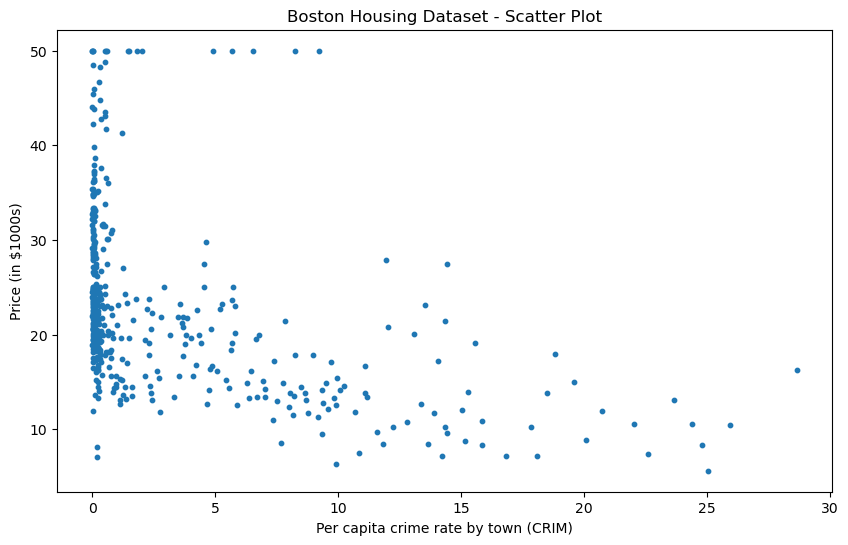

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(df['CRIM'], df['target'], s=10)
plt.xlabel('Per capita crime rate by town (CRIM)')
plt.ylabel('Price (in $1000s)')
plt.title('Boston Housing Dataset - Scatter Plot')
plt.show()

##### Scatter plot of pupil-teacher ratio (PTRATIO) vs. price (PRICE):

This will create a scatter plot of the pupil-teacher ratio by town (PTRATIO) against the price of the houses (in $1000s).


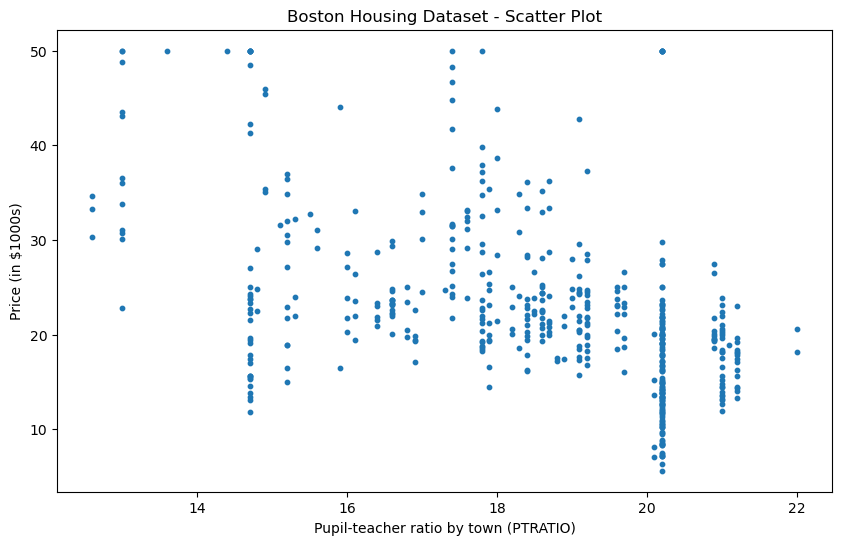

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(df['PTRATIO'], df['target'], s=10)
plt.xlabel('Pupil-teacher ratio by town (PTRATIO)')
plt.ylabel('Price (in $1000s)')
plt.title('Boston Housing Dataset - Scatter Plot')
plt.show()


##### Scatter plot of distance to employment centers (DIS) vs. price (PRICE):

This will create a scatter plot of the distance to employment centers (DIS) against the price of the houses (in $1000s).

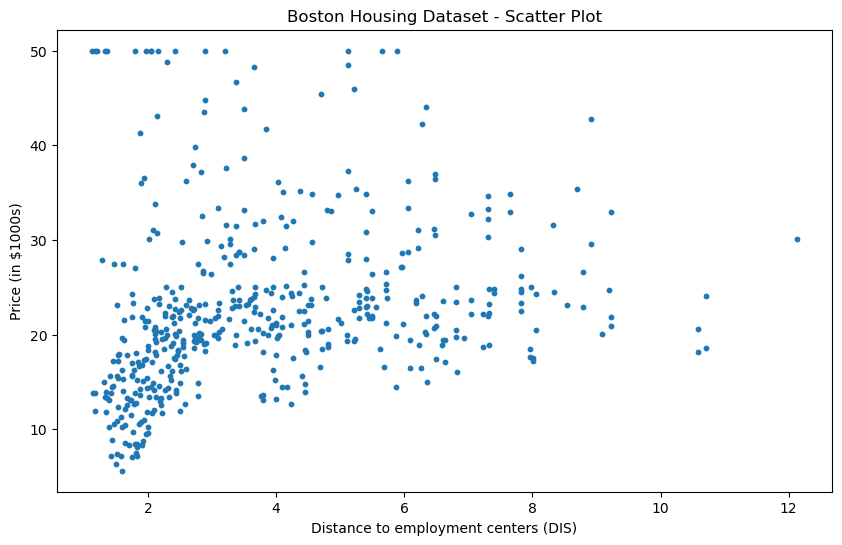

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(df['DIS'], df['target'], s=10)
plt.xlabel('Distance to employment centers (DIS)')
plt.ylabel('Price (in $1000s)')
plt.title('Boston Housing Dataset - Scatter Plot')
plt.show()